In [1]:
import sys
sys.path.append('c:/prog/python/scimple/scm')
import scimple as scm
from scimple import pyspark_utils

using scimple 1.11.0


In [2]:
from ipywidgets import interact, interactive, fixed, interact_manual

In [3]:
import ipywidgets as widgets

In [17]:
# DATA
sc, spark = pyspark_utils.contexts()

In [18]:
df = spark.read.option('header','true').option('separator', ',').csv("c:/prog/data/police-department-incidents.csv")

In [117]:
df.count()

2215024

In [7]:
df.head(1)

[Row(IncidntNum='050436712', Category='ASSAULT', Descript='BATTERY', DayOfWeek='Wednesday', Date='2005-04-20T00:00:00', Time='04:00', PdDistrict='MISSION', Resolution='NONE', Address='18TH ST / CASTRO ST', X='-122.435002864271', Y='37.7608878061245', Location='"{\'human_address\': \'{""address"":""""', PdId='""city"":""""')]

In [8]:
df.columns

['IncidntNum',
 'Category',
 'Descript',
 'DayOfWeek',
 'Date',
 'Time',
 'PdDistrict',
 'Resolution',
 'Address',
 'X',
 'Y',
 'Location',
 'PdId']

In [47]:
pyspark_utils.show(df.take(5))

|IncidntNum|Category|Descript|DayOfWeek|Date|Time|PdDistrict|Resolution|Address|X|Y|Location|PdId|
|--|--|--|--|--|--|--|--|--|--|--|--|--|
|`050436712`|`ASSAULT`|`BATTERY`|`Wednesday`|`2005-04-20T00:00:00`|`04:00`|`MISSION`|`NONE`|`18TH ST / CASTRO ST`|`-122.435002864271`|`37.7608878061245`|`"{'human_address': '{""address"":""""`|`""city"":""""`|
|`080049078`|`LARCENY/THEFT`|`GRAND THEFT FROM A BUILDING`|`Sunday`|`2008-01-13T00:00:00`|`18:00`|`PARK`|`NONE`|`1100 Block of CLAYTON ST`|`-122.446837820235`|`37.7622550270122`|`"{'human_address': '{""address"":""""`|`""city"":""""`|
|`130366639`|`ASSAULT`|`AGGRAVATED ASSAULT WITH A KNIFE`|`Sunday`|`2013-05-05T00:00:00`|`04:10`|`INGLESIDE`|`ARREST, BOOKED`|`0 Block of SGTJOHNVYOUNG LN`|`-122.444707063455`|`37.7249307267936`|`"{'human_address': '{""address"":""""`|`""city"":""""`|
|`030810835`|`DRIVING UNDER THE INFLUENCE`|`DRIVING WHILE UNDER THE INFLUENCE OF ALCOHOL`|`Tuesday`|`2003-07-08T00:00:00`|`01:00`|`SOUTHERN`|`ARREST, BOOKED`|`MASON ST / TURK ST`|`-122.408953598286`|`37.7832878735491`|`"{'human_address': '{""address"":""""`|`""city"":""""`|
|`130839567`|`OTHER OFFENSES`|`TRAFFIC VIOLATION ARREST`|`Friday`|`2013-10-04T00:00:00`|`20:53`|`TENDERLOIN`|`ARREST, BOOKED`|`TURK ST / LEAVENWORTH ST`|`-122.414056291891`|`37.7827931071006`|`"{'human_address': '{""address"":""""`|`""city"":""""`|

In [27]:
pyspark_utils.to_markdown(df.take(5))

'|IncidntNum|Category|Descript|DayOfWeek|Date|Time|PdDistrict|Resolution|Address|X|Y|Location|PdId|\n|--|--|--|--|--|--|--|--|--|--|--|--|--|\n|`050436712`|`ASSAULT`|`BATTERY`|`Wednesday`|`2005-04-20T00:00:00`|`04:00`|`MISSION`|`NONE`|`18TH ST / CASTRO ST`|`-122.435002864271`|`37.7608878061245`|`"{\'human_address\': \'{""address"":""""`|`""city"":""""`|\n|`080049078`|`LARCENY/THEFT`|`GRAND THEFT FROM A BUILDING`|`Sunday`|`2008-01-13T00:00:00`|`18:00`|`PARK`|`NONE`|`1100 Block of CLAYTON ST`|`-122.446837820235`|`37.7622550270122`|`"{\'human_address\': \'{""address"":""""`|`""city"":""""`|\n|`130366639`|`ASSAULT`|`AGGRAVATED ASSAULT WITH A KNIFE`|`Sunday`|`2013-05-05T00:00:00`|`04:10`|`INGLESIDE`|`ARREST, BOOKED`|`0 Block of SGTJOHNVYOUNG LN`|`-122.444707063455`|`37.7249307267936`|`"{\'human_address\': \'{""address"":""""`|`""city"":""""`|\n|`030810835`|`DRIVING UNDER THE INFLUENCE`|`DRIVING WHILE UNDER THE INFLUENCE OF ALCOHOL`|`Tuesday`|`2003-07-08T00:00:00`|`01:00`|`SOUTHERN`|`ARREST,

In [19]:
from pyspark.sql.functions import col
df.createGlobalTempView("calls")

In [10]:
# clean
spark.sql("SELECT * FROM global_temp.calls WHERE PdDistrict IS NULL").collect()

[Row(IncidntNum='166018573', Category='LARCENY/THEFT', Descript='GRAND THEFT FROM LOCKED AUTO', DayOfWeek='Sunday', Date='2016-01-17T00:00:00', Time='23:54', PdDistrict=None, Resolution='NONE', Address='100 Block of VELASCO AV', X='-122.4133519852842', Y='37.70820245849022', Location='"{\'human_address\': \'{""address"":""""', PdId='""city"":""""')]

In [11]:
# df.rdd.map(lambda row: [row[col] if row[col] is not None else 'NONE' for col in df.columns])

In [21]:
%matplotlib notebook

<IPython.core.display.Javascript object>


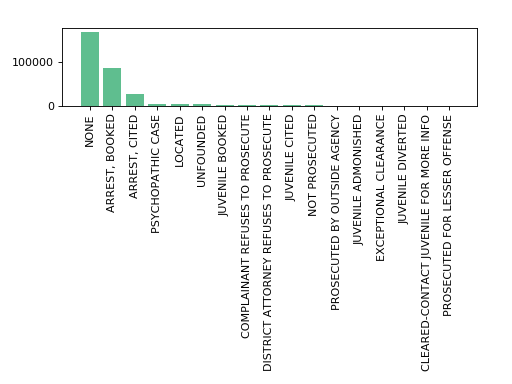

In [24]:
scm.Plot().add(spark.sql("SELECT Resolution, count(*) FROM global_temp.calls WHERE PdDistrict==\"MISSION\" GROUP BY Resolution ORDER BY count(*) DESC").collect(), 0 , 1, marker="bar")

<IPython.core.display.Javascript object>


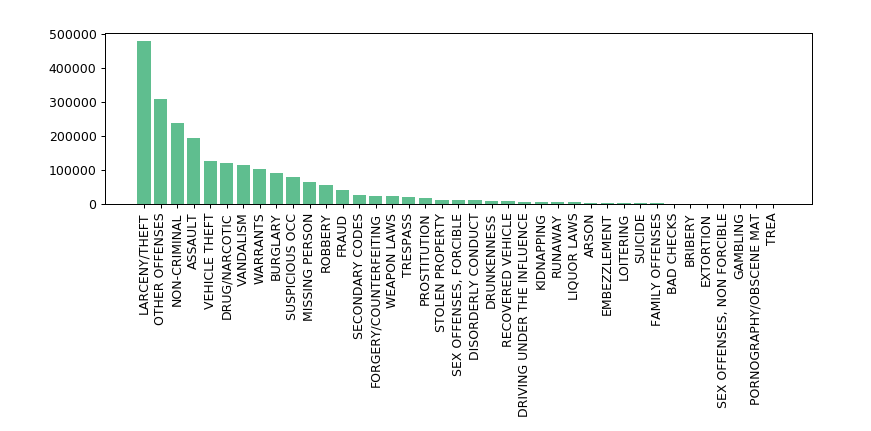

In [21]:
scm.Plot().add(spark.sql("SELECT Category, count(*) FROM global_temp.calls GROUP BY Category ORDER BY count(*) DESC").collect(), 0 , 1, marker="bar")

<IPython.core.display.Javascript object>


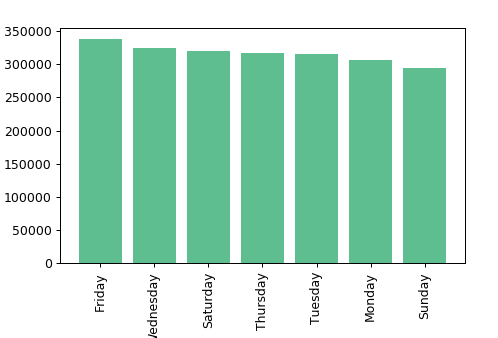

In [22]:
scm.Plot().add(spark.sql("SELECT DayOfWeek, count(*) FROM global_temp.calls GROUP BY DayOfWeek ORDER BY count(*) DESC").collect(), 0 , 1, marker="bar")

In [15]:
spark.sql("SELECT min(Date), max(Date) FROM global_temp.calls").collect()

[Row(min(Date)='2003-01-01T00:00:00', max(Date)='2018-05-15T00:00:00')]

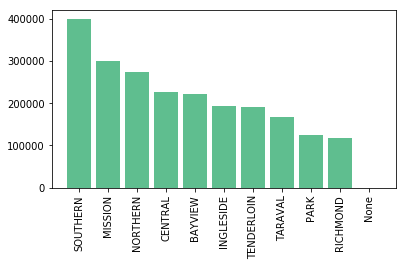

In [7]:
scm.Plot().add(spark.sql("SELECT PdDistrict, count(*) FROM global_temp.calls GROUP BY PdDistrict ORDER BY count(*) DESC ").collect(), 0 , 1, marker="bar")

In [95]:
to_plot_month = spark.sql("""SELECT Month, count(*) FROM (
  SELECT *, SUBSTRING(Date, 0, 7) as Month FROM global_temp.calls WHERE Category=="LARCENY/THEFT") 
  GROUP BY Month ORDER BY Month""").collect()
to_plot_year = spark.sql("""SELECT Month, count(*) FROM (
  SELECT *, SUBSTRING(Date, 0, 4) as Month FROM global_temp.calls WHERE Category=="LARCENY/THEFT") 
  GROUP BY Month ORDER BY Month""").collect()

<IPython.core.display.Javascript object>


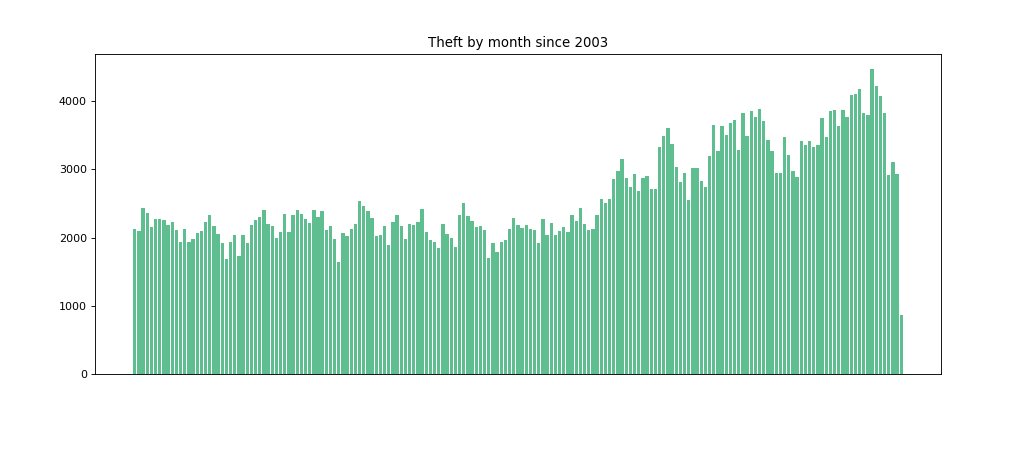

<IPython.core.display.Javascript object>


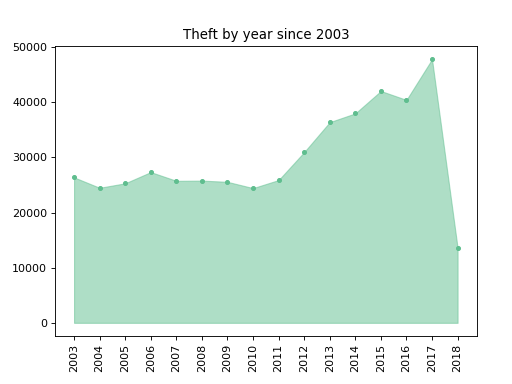

In [97]:
scm.Plot(title="Theft by month since 2003").add(to_plot_month, 0 , 1, marker="bar").axe.set_xticks([])
scm.Plot(title="Theft by year since 2003").add(to_plot_year, 0 , 1, marker=".", markersize=7, colored_area=0.5).fig.savefig("test.svg", format="svg")

In [45]:
date="2018-01"
to_plot__ = spark.sql(f"""SELECT FLOAT(X), FLOAT(Y) FROM global_temp.calls 
WHERE SUBSTRING(Date, 0, 7) == "{date}" AND Category == "ASSAULT" """).collect()

In [91]:
date2="2018-01"
to_plot_ = spark.sql(f"""SELECT FLOAT(X), FLOAT(Y) FROM global_temp.calls 
WHERE Date == "{date+'T00:00:00'}"  """).collect()

In [93]:
to_plot_

[]

<IPython.core.display.Javascript object>


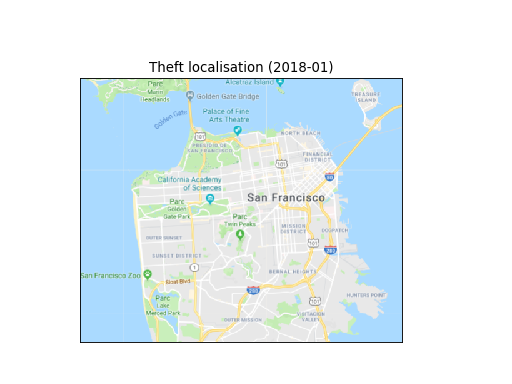

ValueError: last_line should be greater than or equal to first_line (default 0)

In [92]:
%matplotlib notebook
import matplotlib.image as mim
p = scm.Plot(title=f"Theft localisation ({date})")
p.axe.imshow(mim.imread("c:/prog/python/dataviz/sf.png"))
p.axe.set_xticks([])
p.axe.set_yticks([])
p.add(list(map(lambda e: ((e[0]+122.44)*2700+277, -1*((e[1]-37.76)*3320-243)), to_plot_)), 0, 1, marker=".", markersize=1, colored_by="#dd8888")

<IPython.core.display.Javascript object>


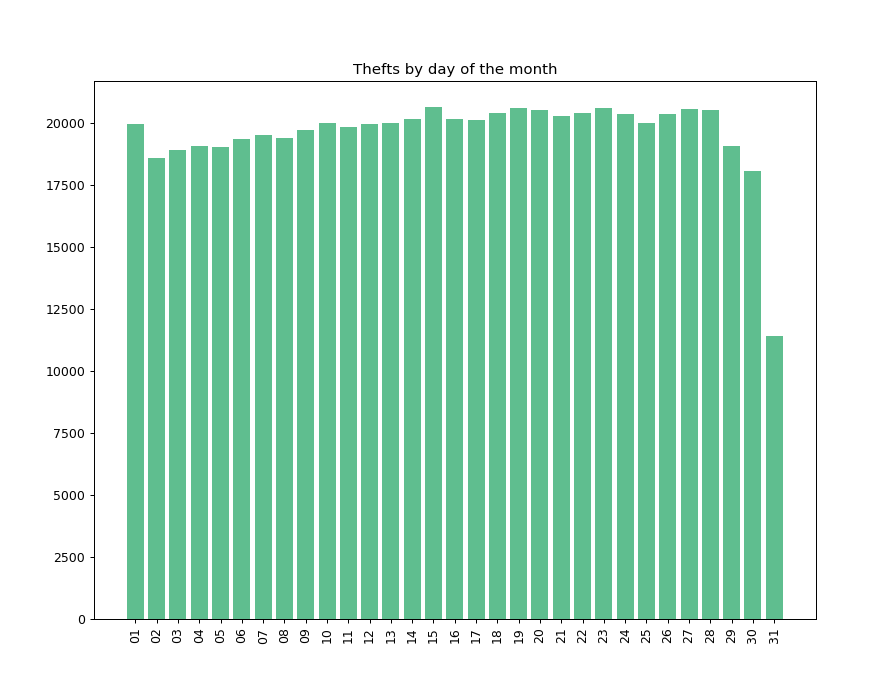

In [112]:
scm.Plot(title="Thefts by day of the month").add(spark.sql("SELECT SUBSTRING(Date,9,2) as dayOfMonth, count(*) FROM global_temp.calls WHERE Category==\"LARCENY/THEFT\" OR Category==\"VEHICLE THEFT\" GROUP BY SUBSTRING(Date,9,2) ORDER BY SUBSTRING(Date,9,2) ").collect(), 0 , 1, marker="bar")

## Process

In [25]:
from pyspark import Row
from pyspark.sql.types import *
schema = StructType([StructField('Address', StringType()),
                    StructField('Category', StringType()),
                    StructField('Date', StringType()),
                    StructField('DayOfMonth', StringType()),
                    StructField('DayOfWeek', StringType()),
                    StructField('Descript', StringType()),
                    StructField('Hour', StringType()),
                    StructField('IncidntNum', StringType()),
                    StructField('Location', StringType()),
                    StructField('Month', StringType()),
                    StructField('PdDistrict', StringType()),
                    StructField('PdId', StringType()),
                    StructField('Resolution', StringType()),
                    StructField('Time', StringType()),
                    StructField('Type', StringType()),
                    StructField('X', StringType()),
                    StructField('Y', StringType()),
                    StructField('Year', StringType()),
                    StructField('YearAndMonth', StringType())])

In [26]:
new_df = spark.sql("""SELECT *, SUBSTRING(Date, 6, 2) as Month, SUBSTRING(Date, 0, 4) as Year, SUBSTRING(Date, 0, 7) as YearAndMonth, SUBSTRING(Date,9,2) as DayOfMonth, SUBSTRING(Time,0,2) as Hour FROM global_temp.calls""")

In [27]:
new_df = new_df.withColumnRenamed("Category", "Type")

In [42]:
new_df.rdd.map(lambda row: Row(**row.asDict(), Category=get_category(row['Type'])))

PythonRDD[83] at RDD at PythonRDD.scala:48

In [29]:
new_df_ = spark.createDataFrame(new_df.rdd.map(lambda row: Row(**row.asDict(), Category=get_category(row['Type']))), schema)

In [24]:
new_df_.take(1)

[Row(Address='18TH ST / CASTRO ST', Category='VIOLENCE', Date='2005-04-20T00:00:00', DayOfMonth='20', DayOfWeek='Wednesday', Descript='BATTERY', Hour='04', IncidntNum='050436712', Location='"{\'human_address\': \'{""address"":""""', Month='04', PdDistrict='MISSION', PdId='""city"":""""', Resolution='NONE', Time='04:00', Type='ASSAULT', X='-122.435002864271', Y='37.7608878061245', Year='2005', YearAndMonth='2005-04')]

In [ ]:
@interact(x=range(100, 1000), a=widgets.IntSlider(min=-10,max=30,step=1,value=10))
def f(x, a):
    scm.Plot().add(None, range(x), list(map(lambda x:x**a,range(x))))

In [16]:
spark.sql("""SELECT DISTINCT Category FROM global_temp.calls""").collect()

NameError: name 'spark' is not defined

In [143]:
spark.sql("""SELECT count(*) FROM global_temp.calls WHERE Category=\"TREA\"""").collect()

[Row(count(1)=14)]

In [28]:
super_cat = {'FRAUD':['BAD CHECKS', 'EMBEZZLEMENT', 'WEAPON LAWS','BRIBERY', 'GAMBLING', 'FRAUD', 'LIQUOR LAWS', 'SECONDARY CODES', 'FORGERY/COUNTERFEITING'],
'WANTED':[ 'WARRANTS','RECOVERED VEHICLE'],
'FAMILY OFFENSES':['FAMILY OFFENSES'],
'MISSING PERSON':['MISSING PERSON', 'KIDNAPPING'],
'OTHER OFFENSES':['OTHER OFFENSES'],
'DRUGS/ALCOHOL':['DRUG/NARCOTIC', 'DRUNKENNESS','DRIVING UNDER THE INFLUENCE',],
'THEFT':['BURGLARY', 'EXTORTION', 'ROBBERY', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'LARCENY/THEFT'],
'VIOLENCE': ['ASSAULT'],
'TREA':['TREA'],
'DELINQUENCY/DISTURBANCE': ['TRESPASS', 'PORNOGRAPHY/OBSCENE MAT', 'VANDALISM', 'RUNAWAY', 'ARSON','LOITERING', 'SUSPICIOUS OCC', 'DISORDERLY CONDUCT'],
'SEX OFFENSES':['SEX OFFENSES, FORCIBLE', 'SEX OFFENSES, NON FORCIBLE'],
'PROSTITUTION':['PROSTITUTION'],
'NON-CRIMINAL':['NON-CRIMINAL']
}

def get_category(type_):
    for key in super_cat:
        if type_ in super_cat[key]:
            return key

In [15]:
len(flatten_n_times(1, super_cat.values()))

37

In [147]:
get_category('ARSON')

'DELINQUENCY/BAD COMPORTMENT'

In [30]:
new_df_.repartition(1).write.option('header','true').option('separator', ',').csv("c:/prog/data/police-department-incidents__.csv")

In [9]:
spark.read.option('header','true').option('separator', ',').csv("c:/prog/data/police-department-incidents_.csv/police-department-incidents_.csv").take(1)

[Row(Address='18TH ST / CASTRO ST', Category='VIOLENCE', Date='2005-04-20T00:00:00', DayOfMonth='20', DayOfWeek='Wednesday', Descript='BATTERY', Hour='04', IncidntNum='050436712', Location='"{\'human_address\': \'{""address"":""""', Month='04', PdDistrict='MISSION', PdId='""city"":""""', Resolution='NONE', Time='04:00', Type='ASSAULT', X='-122.435002864271', Y='37.7608878061245', Year='2005', YearAndMonth='2005-04')]

In [14]:
from scimple import flatten_n_times

In [29]:
print("\">\n<option value=\"".join([row['Resolution'] for row in spark.sql("""SELECT DISTINCT Resolution FROM global_temp.calls""").collect()]))

JUVENILE BOOKED">
<option value="EXCEPTIONAL CLEARANCE">
<option value="ARREST, BOOKED">
<option value="CLEARED-CONTACT JUVENILE FOR MORE INFO">
<option value="PROSECUTED FOR LESSER OFFENSE">
<option value="LOCATED">
<option value="UNFOUNDED">
<option value="DISTRICT ATTORNEY REFUSES TO PROSECUTE">
<option value="JUVENILE ADMONISHED">
<option value="PSYCHOPATHIC CASE">
<option value="COMPLAINANT REFUSES TO PROSECUTE">
<option value="JUVENILE DIVERTED">
<option value="JUVENILE CITED">
<option value="ARREST, CITED">
<option value="PROSECUTED BY OUTSIDE AGENCY">
<option value="NONE">
<option value="NOT PROSECUTED


In [1]:
import sys
sys.path.append('c:/prog/python/scimple/scm')
import scimple as scm
from scimple import pyspark_utils

using scimple 1.11.0


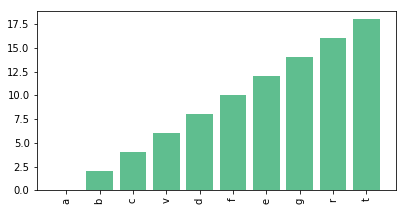

In [12]:
p=scm.Plot().add(x=list("abcvdfegrt"), y=range(0,20,2), marker='bar')
extent = (*p.axe.get_xlim(), *p.axe.get_ylim())
aspect=2
p._ax.set_aspect(abs((extent[1] - extent[0]) / (extent[3] - extent[2])) / aspect)
